In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

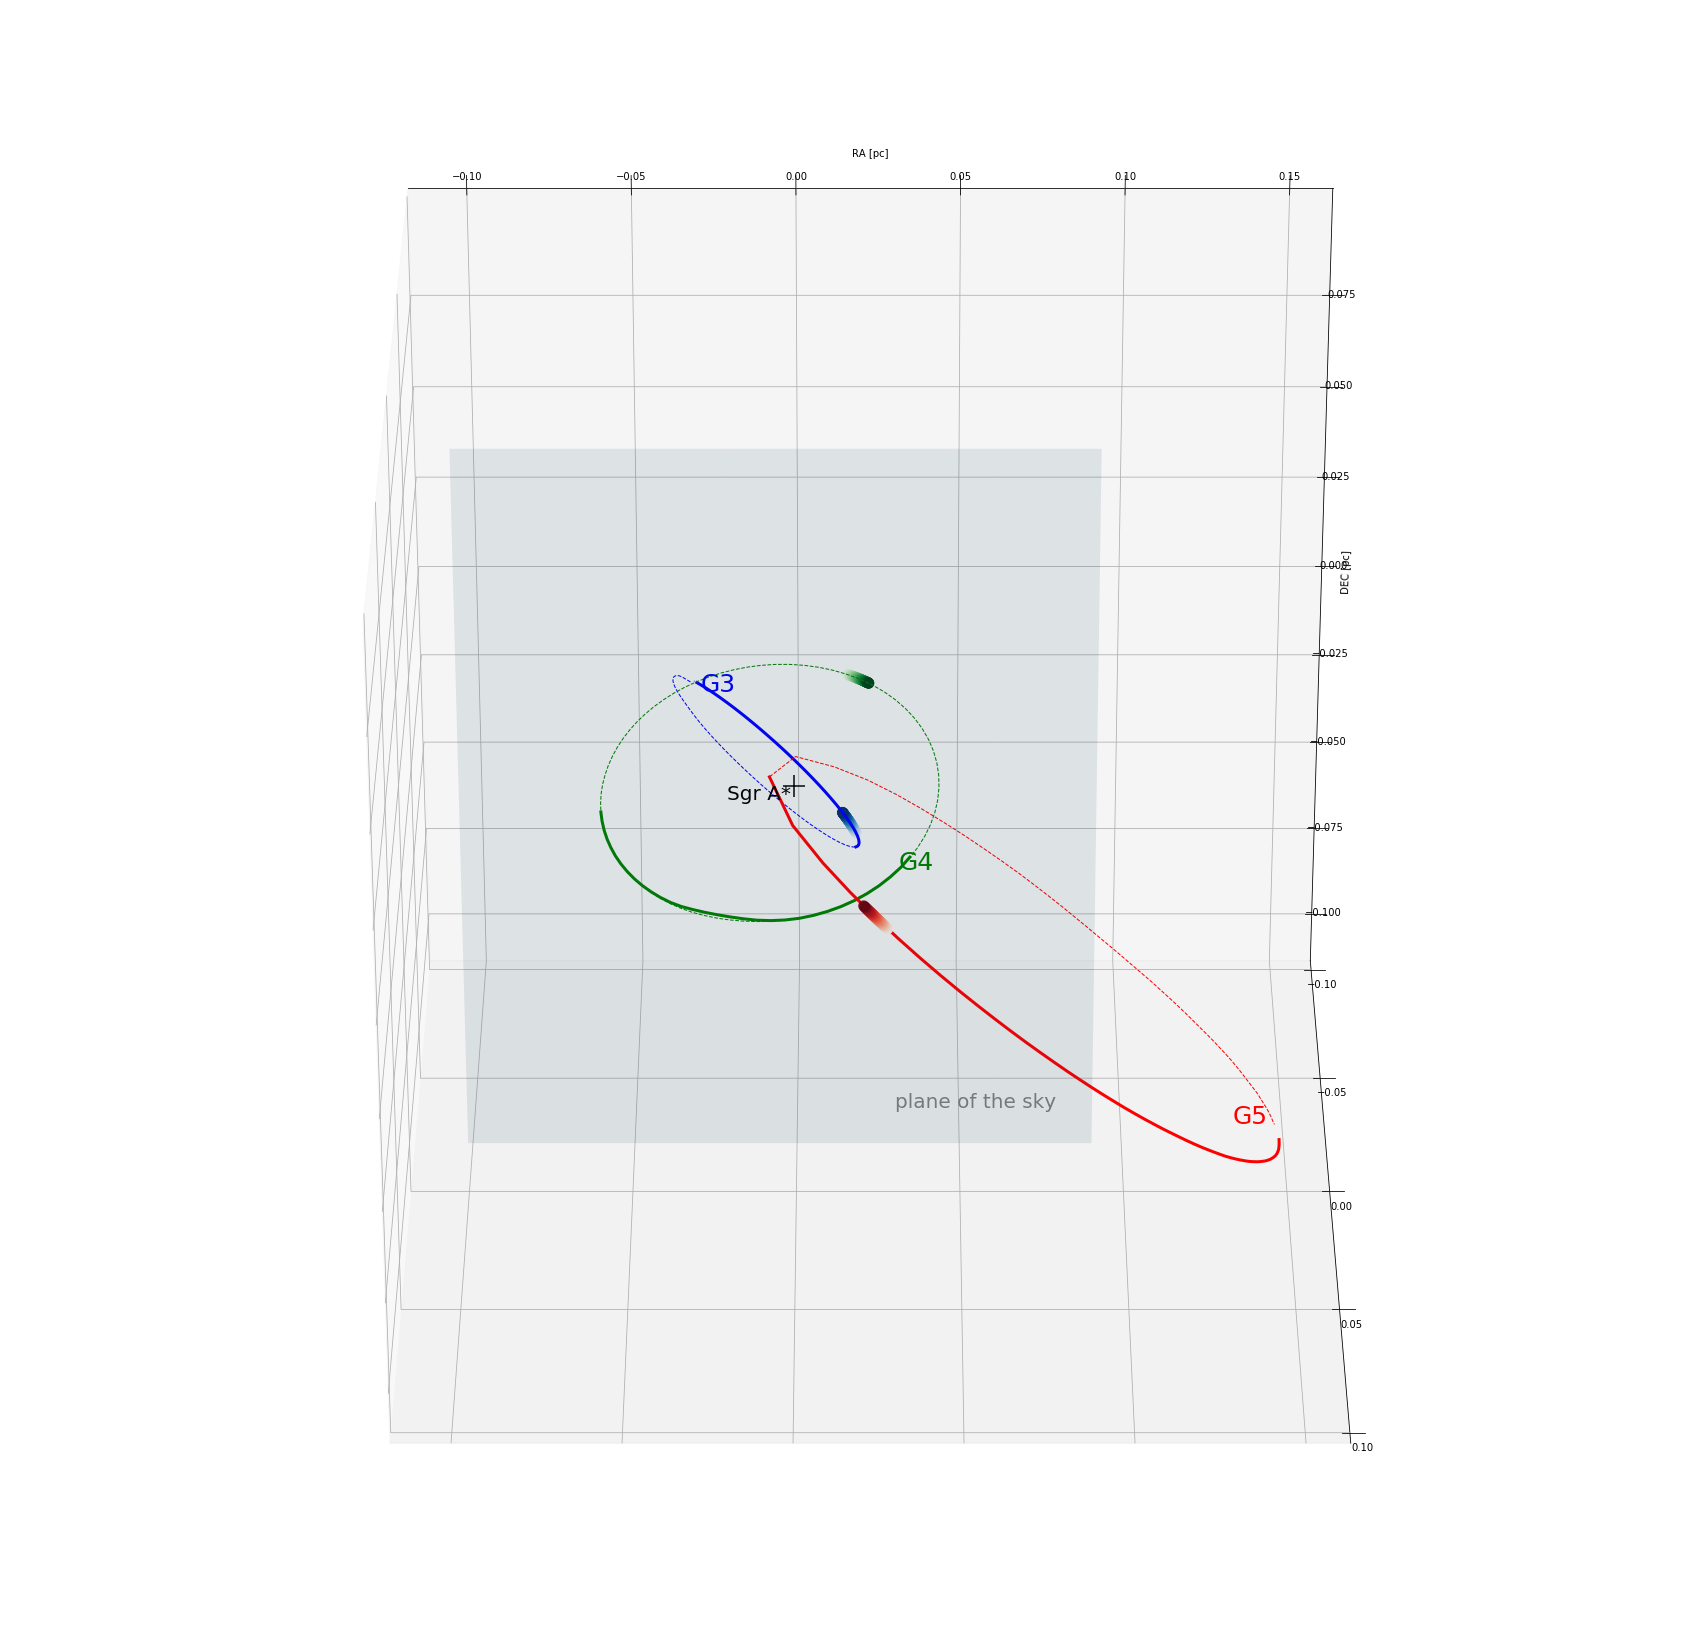

In [157]:
## Plot ##

fig = plt.figure(figsize=(30,30))
ax  = fig.gca(projection='3d')
plt.xlabel('RA [pc]')
plt.ylabel('DEC [pc]')
#plt.zlabel('z [pc]')

## Plot plane of the sky
x = np.arange(-.1,.1, 0.01)
y = np.arange(-.1,.1, 0.01)
x, y = np.meshgrid(x, y)
z = (x + y)*0
ax.plot_surface(x, y, z, rstride=8, cstride=8, alpha=0.1)
#ax.text(.03, .080, .0, 'plane of the sky', color='gray', size=20)
ax.text(.03, -.09, .0, 'plane of the sky', color='gray', size=20)

## Plot Sgr A*
ax.scatter(0,0,0, s=500,color='black', marker='+')
ax.text(-0.02, -0.004, 0, 'Sgr A*', size=20)

## Plot stars
### S0-2 ....

## Load files ##
blobs = ['G3', 'G4', 'G5'] 
cols  = ['blue', 'green', 'red']
corrs = ['', '_sys', '_sys'] # '' # _sys ##### vz0 # sysRV
mapcols = ['Blues', 'Greens', 'Reds']

for i in range(0, len(blobs)):
    blob = blobs[i]
    col  = cols[i]
    corr = corrs[i]
    mapcol = mapcols[i]
    pos = np.loadtxt('./chains_'+blob+corr+'/'+blob+'_mod_sing.pos')
    pos_whole = np.loadtxt('./chains_'+blob+corr+'/'+blob+'_mod_whole.pos')
    # format: date x y z [AU]

    pos[:,1:4] = pos[:,1:4] * 4.84814e-6 # AU -> pc
    pos_whole[:,1:4] = pos_whole[:,1:4] * 4.84814e-6 # AU -> pc
    ax.scatter(pos[:,1], pos[:,2], -pos[:,3], c=pos[:,0], cmap=mapcol, s=100)
    xG = pos_whole[:,1]
    yG = pos_whole[:,2]
    zG = -pos_whole[:,3]
    xG_front = xG[zG>=0.]
    yG_front = yG[zG>=0.]
    zG_front = zG[zG>=0.]
    idx = (np.abs(zG_front - 0.)).argmin()
    ax.plot(xG, yG, zG, color=col, linewidth=1, linestyle='--')
    ax.plot(xG_front[0:idx], yG_front[0:idx], zG_front[0:idx], color=col, linewidth=3, linestyle='-')
    ax.text(xG[0]*.9, yG[0]*.9, zG[0]*1.2, blob, color=col, size=25)

ax.view_init(120, -90) # prospective view
#ax.view_init(90, -90) # view from front
#ax.view_init(180, -90) # view from above

#ax.set_xlim([-.5,.5])
#ax.set_ylim([-.5,.5])
ax.set_zlim([-.1,.1])
ax.zaxis.set_major_locator(LinearLocator(5))

plt.savefig('3D_plot.png')
#plt.savefig('prop_mot.eps')

plt.show()